# Predicting the Operational Status of Water Wells in Tanzania

DRIVEN DATA CHALLENGE

## 0. Introduction
The datasets are hosted by DrivenData: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

The data consist of information (40 features) on water wells in Tanzania.
The goal is to predict whether a well is "functional", "functional but in need of repairs", or "non functional".

The datasets are:
- Training set values (59,400 observations, 40 variables: id, date, location, installer, etc.)
- Training set labels (59,400 observations, 2 variables: id, status_group)
- Test set values (14,850 observations, 40 variables)

This analysis was conducted using Data Camp online course: DrivenData Water Pumps Challenge.

## 1. Exploration and visualization of the data

In [4]:
# Read the test dataset
test <- read.csv('TestSetValues.csv')
head(test)
str(test)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


'data.frame':	14850 obs. of  40 variables:
 $ id                   : int  50785 51630 17168 45559 49871 52449 24806 28965 36301 54122 ...
 $ amount_tsh           : num  0 0 0 0 500 0 0 0 30 0 ...
 $ date_recorded        : Factor w/ 331 levels "2001-03-26","2004-01-04",..: 256 256 253 243 307 284 35 246 244 298 ...
 $ funder               : Factor w/ 981 levels "","0","A/co Germany",..: 177 252 1 224 75 252 252 225 894 417 ...
 $ gps_height           : int  1996 1569 1567 267 1260 1685 550 234 584 1083 ...
 $ installer            : Factor w/ 1092 levels "","0","AAR","ABASIA",..: 234 249 1 275 90 249 304 276 491 487 ...
 $ longitude            : num  35.3 36.7 34.8 38.1 35 ...
 $ latitude             : num  -4.06 -3.31 -5 -9.42 -10.95 ...
 $ wpt_name             : Factor w/ 10840 levels "<Kwa Maluku",..: 657 1781 9675 5596 5707 7901 9302 4691 5456 3032 ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin                : Factor w/ 9 levels "Internal","Lake Nyasa",..: 1 6 1

In [5]:
# Read the training_values dataset
training_values <- read.csv('TrainingSetValues.csv')
head(training_values)
str(training_values)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


'data.frame':	59400 obs. of  40 variables:
 $ id                   : int  69572 8776 34310 67743 19728 9944 19816 54551 53934 46144 ...
 $ amount_tsh           : num  6000 0 25 0 0 20 0 0 0 0 ...
 $ date_recorded        : Factor w/ 356 levels "2002-10-14","2004-01-07",..: 48 310 301 273 105 47 187 195 220 126 ...
 $ funder               : Factor w/ 1898 levels "","0","A/co Germany",..: 1371 471 827 1743 22 987 347 1418 1844 595 ...
 $ gps_height           : int  1390 1399 686 263 0 0 0 0 0 0 ...
 $ installer            : Factor w/ 2146 levels "","-","0","A.D.B",..: 1557 593 2115 1927 119 435 446 435 2045 119 ...
 $ longitude            : num  34.9 34.7 37.5 38.5 31.1 ...
 $ latitude             : num  -9.86 -2.15 -3.82 -11.16 -1.83 ...
 $ wpt_name             : Factor w/ 37400 levels "24","A Kulwa",..: 32437 37197 14574 37291 35531 36139 20674 36485 21733 25773 ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin                : Factor w/ 9 levels "Internal","Lake Nyasa

In [6]:
# Read the training_labels dataset
training_labels <- read.csv('TrainingSetLabels.csv')
head(training_labels)
str(training_labels)

id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional


'data.frame':	59400 obs. of  2 variables:
 $ id          : int  69572 8776 34310 67743 19728 9944 19816 54551 53934 46144 ...
 $ status_group: Factor w/ 3 levels "functional","functional needs repair",..: 1 1 1 3 1 1 3 3 3 1 ...


In [7]:
# Combine (join) the training_values and training_labels datasets
library(dplyr)
training <- dplyr::left_join(training_values, training_labels, by = "id")
head(training)
str(training)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


'data.frame':	59400 obs. of  41 variables:
 $ id                   : int  69572 8776 34310 67743 19728 9944 19816 54551 53934 46144 ...
 $ amount_tsh           : num  6000 0 25 0 0 20 0 0 0 0 ...
 $ date_recorded        : Factor w/ 356 levels "2002-10-14","2004-01-07",..: 48 310 301 273 105 47 187 195 220 126 ...
 $ funder               : Factor w/ 1898 levels "","0","A/co Germany",..: 1371 471 827 1743 22 987 347 1418 1844 595 ...
 $ gps_height           : int  1390 1399 686 263 0 0 0 0 0 0 ...
 $ installer            : Factor w/ 2146 levels "","-","0","A.D.B",..: 1557 593 2115 1927 119 435 446 435 2045 119 ...
 $ longitude            : num  34.9 34.7 37.5 38.5 31.1 ...
 $ latitude             : num  -9.86 -2.15 -3.82 -11.16 -1.83 ...
 $ wpt_name             : Factor w/ 37400 levels "24","A Kulwa",..: 32437 37197 14574 37291 35531 36139 20674 36485 21733 25773 ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin                : Factor w/ 9 levels "Internal","Lake Nyasa


             functional functional needs repair          non functional 
                  32259                    4317                   22824 


             functional functional needs repair          non functional 
             0.54308081              0.07267677              0.38424242 

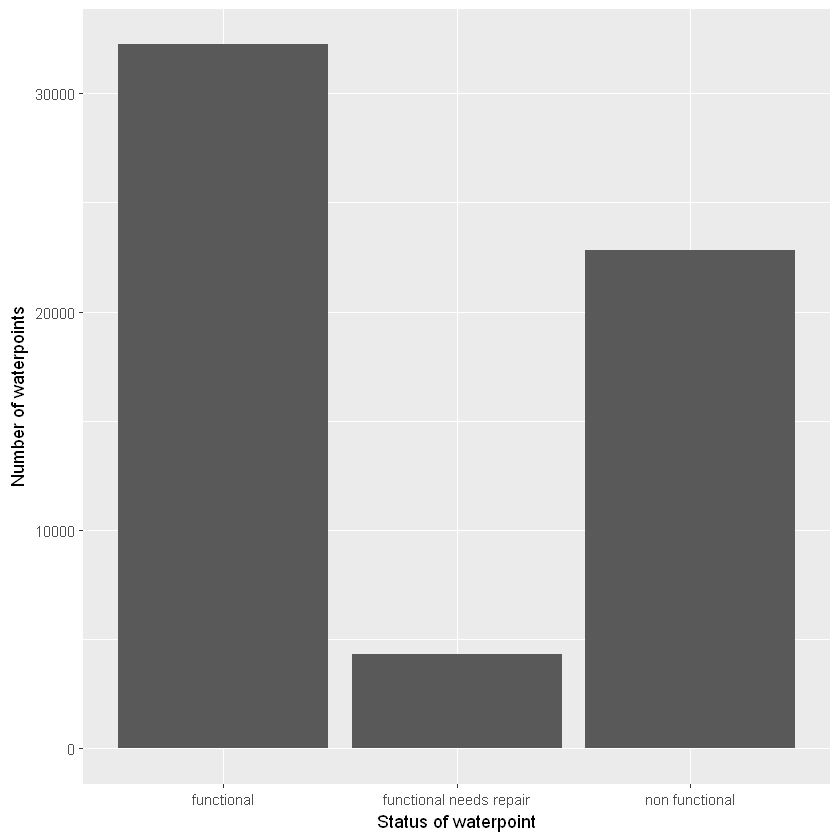

In [8]:
# Look at the distribution of labels (as a table) 
table(training$status_group)

# Look at the distribution of labels (as a table with percentage) 
prop.table(table(training$status_group))

# Look at the distribution of labels (as a bar plot)
library(ggplot2)
ggplot(training, aes(x = training$status_group)) + 
    geom_bar() +
    xlab("Status of waterpoint") +
    ylab("Number of waterpoints")

                         
                              0  1960  1961  1962  1963  1964  1965  1966  1967
  functional              10555    24     2     7    31     7    11     6    31
  functional needs repair  1789     6     3     1     6     1     1     0    17
  non functional           8365    72    16    22    48    32     7    11    40
                         
                           1968  1969  1970  1971  1972  1973  1974  1975  1976
  functional                 22    15    99    82   178    55   234   144    85
  functional needs repair     4     3    15     6    68     8    39    41    52
  non functional             51    41   297    57   462   121   403   252   277
                         
                           1977  1978  1979  1980  1981  1982  1983  1984  1985
  functional                 62   426    41   258    85   236   187   365   324
  functional needs repair    10    97    12    60    11    54    21    66    84
  non functional            130   514   13

                         
                                    0        1960        1961        1962
  functional              0.509681781 0.235294118 0.095238095 0.233333333
  functional needs repair 0.086387561 0.058823529 0.142857143 0.033333333
  non functional          0.403930658 0.705882353 0.761904762 0.733333333
                         
                                 1963        1964        1965        1966
  functional              0.364705882 0.175000000 0.578947368 0.352941176
  functional needs repair 0.070588235 0.025000000 0.052631579 0.000000000
  non functional          0.564705882 0.800000000 0.368421053 0.647058824
                         
                                 1967        1968        1969        1970
  functional              0.352272727 0.285714286 0.254237288 0.240875912
  functional needs repair 0.193181818 0.051948052 0.050847458 0.036496350
  non functional          0.454545455 0.662337662 0.694915254 0.722627737
                         
        

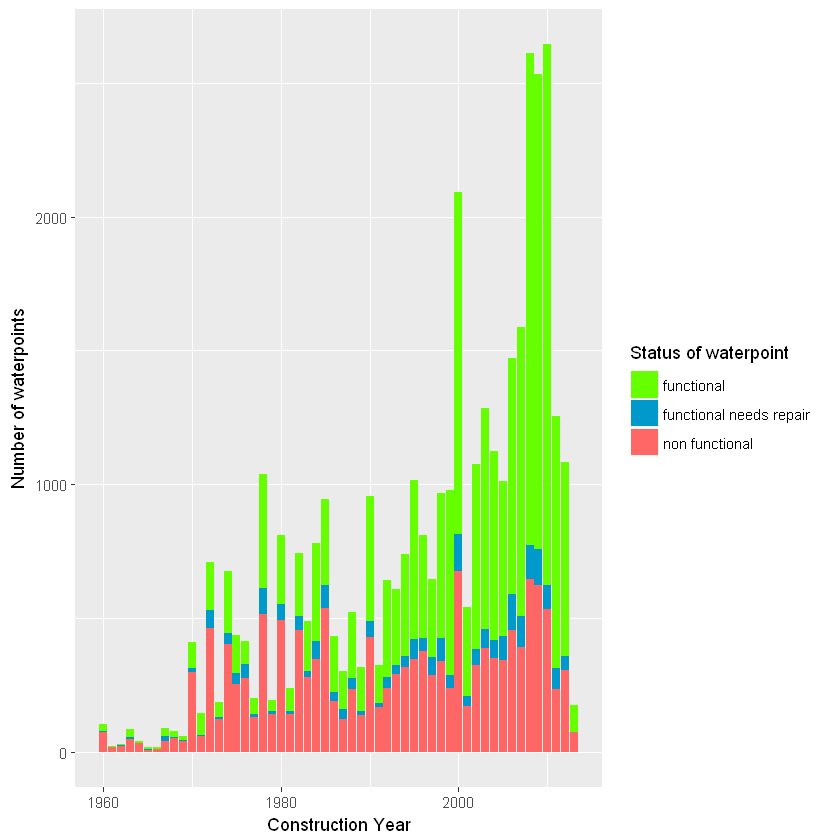

In [9]:
# Look at the distribution of labels per construction_year
table(training$status_group, training$construction_year)
prop.table(table(training$status_group, training$construction_year), margin = 2)

# Creating color scale for the labels: functional (green), functional need repair (blue), non functional (red)
color_label <- c("#66FF00", "#0099CC", "#FF6666")

# "Eliminating" the construction year of 0 (probably indicating missing data) for better graph representation
ggplot(subset(training, construction_year > 0),
    aes(x = construction_year, fill = status_group)) + 
    geom_bar() +
    xlab("Construction Year")  +
    ylab("Number of waterpoints") +
    labs(fill = "Status of waterpoint") +
    scale_fill_manual(values=color_label)

#### Feature: construction_year

We note that:
- There are a lot of missing data - more than 20,000 water wells (35% of training observations) have no construction year reported (value of 0).
- Among the wells with reported construction years, more are constructed recently (after year 2000) than in the past (1960s). 
- Among the wells with reported construction years, the proportion of "non functional wells" is higher for older wells than for recent wells.

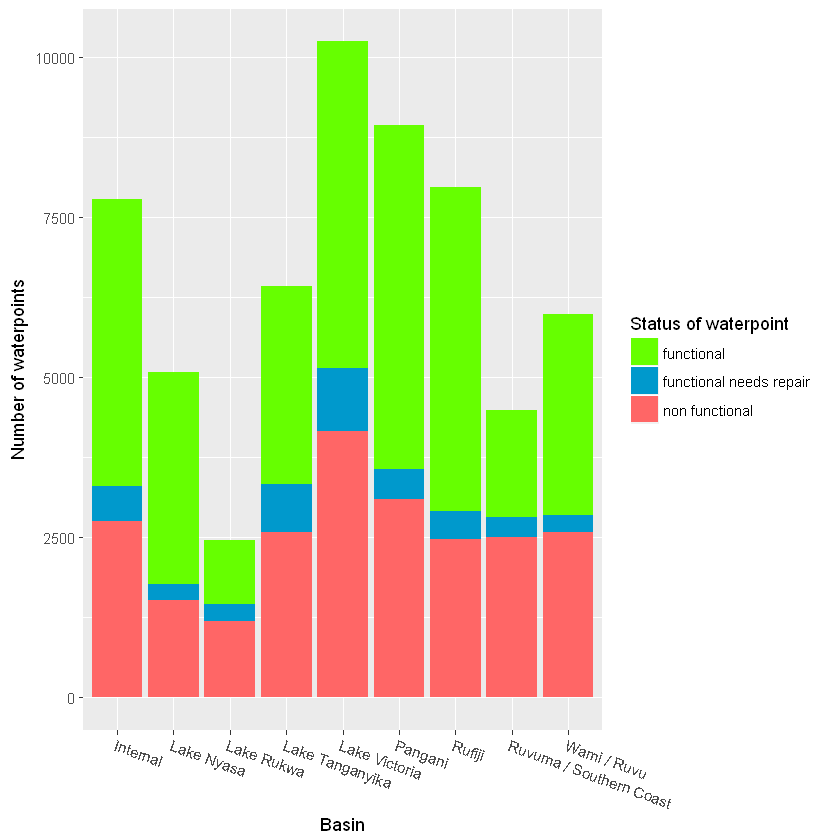

In [10]:
# Look at distribution of labels per basin
ggplot(training,
    aes(x = basin, fill = status_group)) + 
    geom_bar() +
    xlab("Basin")  +
    theme(axis.text.x=element_text(angle = -20, hjust = 0)) +
    ylab("Number of waterpoints") +
    labs(fill = "Status of waterpoint") +
    scale_fill_manual(values=color_label)

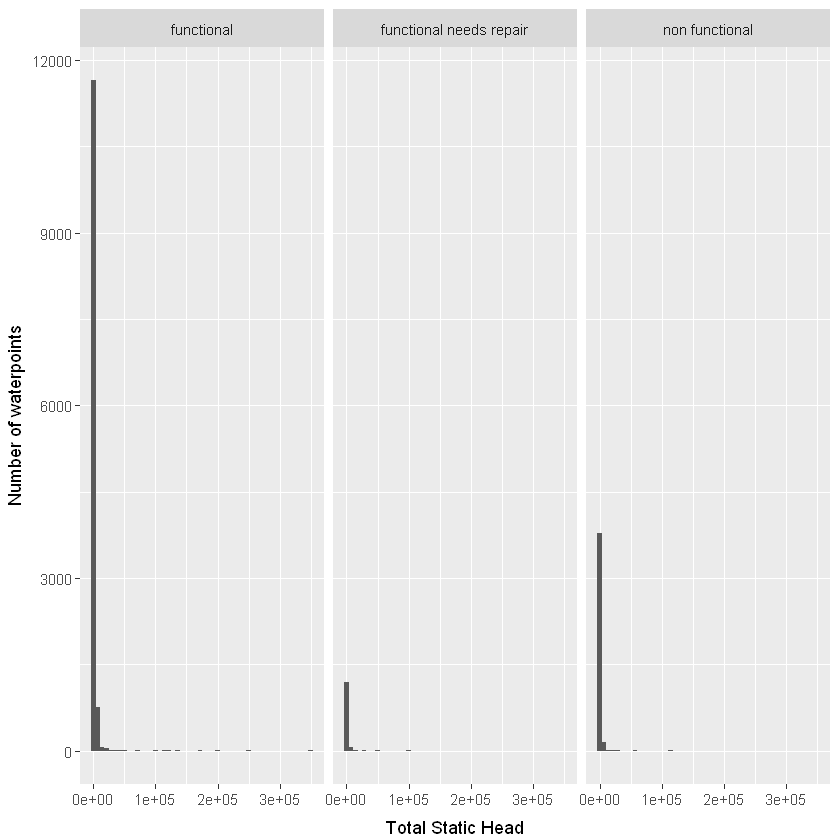

In [11]:
# Look at distribution of labels per total static head (quantity of water available at waterpoint)
ggplot(subset(training, amount_tsh > 0),
    aes(x = amount_tsh)) + 
    geom_histogram(bins = 50) +
    facet_wrap(~ status_group) +
    xlab("Total Static Head") +
    ylab("Number of waterpoints") 

### Mapping wells

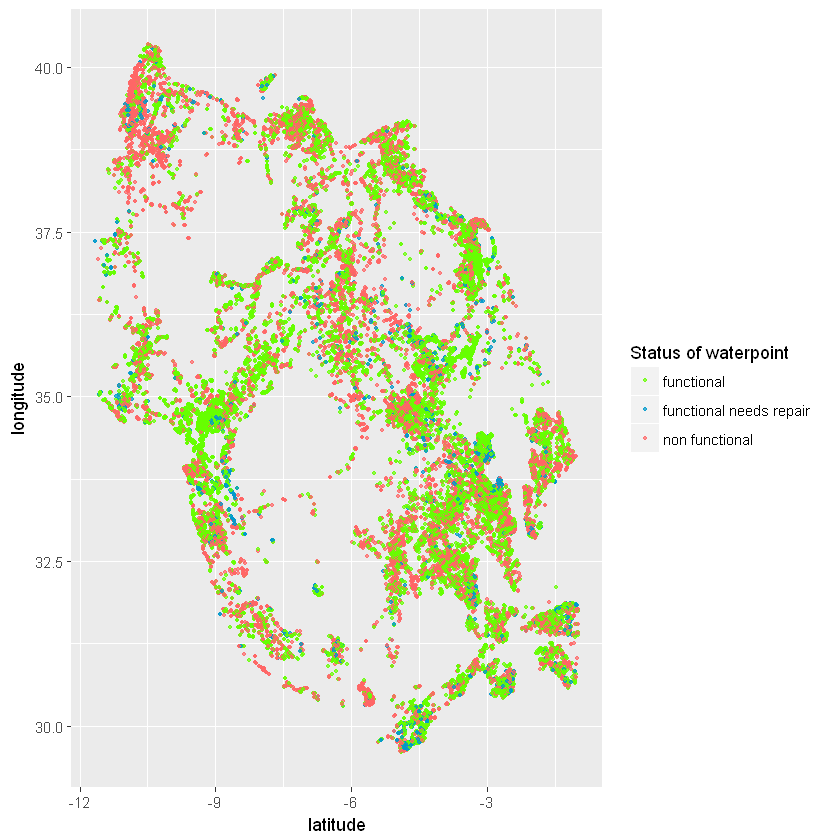

In [25]:
# Scatter plot of latitude vs. longitude
# Subset to remove missing data (lat = 0, long = 0))
ggplot(subset(training, latitude < 0 & longitude > 0),
    aes(x = latitude, y = longitude, color = status_group)) +
    geom_point(size = 0.7, alpha = 0.7) +
    scale_color_manual(values=color_label) +
    labs(color = "Status of waterpoint")

In [34]:
# Add map of Tanzania with Google Vis package
library(googleVis)

# Create a column of latitude and longitude to input into gvisGeoChart
training$latlong <- paste(round(training$latitude, 2), round(training$longitude, 2), sep = ":")

# Use gvisGeoChart to create an interactive map with well locations
wells_map <- gvisGeoChart(training[1:1000,], 
                          locationvar = "latlong", 
                          colorvar = "status_group", 
                          options = list(region = "TZ"))

wells_map

# SEEMS THAT GOOGLE VIS DOES NOT WORK IN JUPYTER: https://github.com/jupyter/help/issues/51
# THE ABOVE CODE IS NOT WORKING IN R STUDIO EITHER

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
  "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>GeoChartID2ff43c9b3f40</title>
<meta http-equiv="content-type" content="text/html;charset=utf-8" />
<style type="text/css">
body {
  color: #444444;
  font-family: Arial,Helvetica,sans-serif;
  font-size: 75%;
  }
  a {
  color: #4D87C7;
  text-decoration: none;
}
</style>
</head>
<body>
 <!-- GeoChart generated in R 3.3.2 by googleVis 0.6.2 package -->
<!-- Wed Mar 08 17:37:34 2017 -->


<!-- jsHeader -->
<script type="text/javascript">
 
// jsData 
function gvisDataGeoChartID2ff43c9b3f40 () {
var data = new google.visualization.DataTable();
var datajson =
[
 [
-9.86,
34.94,
1
],
[
-2.15,
34.7,
1
],
[
-3.82,
37.46,
1
],
[
-11.16,
38.49,
3
],
[
-1.83,
31.13,
1
],
[
-4.77,
39.17,
1
],
[
-3.77,
33.36,
3
],
[
-4.23,
32.62,
3
],
[
-5.15,
32.71,
3
],
[
-1.26,
30.63,
1
],
[
-7.03,
39.21,
1
],
[
-10.57,
35.77,
1
],
[
-3.29,
33.8,
1
],
[
-3.18,
37.09,
1
],
[
-3.63,
34.36,
1
],
[
-8.27,
31.44,
1
],
[
-9.11,
34.64,
3
],
[
-9.09,
34.57,
3
],
[
-1.95,
32.92,
2
],
[
-9.89,
34.51,
1
],
[
-9.59,
34.47,
1
],
[
0,
0,
1
],
[
-8.98,
34.59,
2
],
[
-4.13,
37.94,
1
],
[
-4.5,
29.75,
1
],
[
-3.32,
37.42,
2
],
[
-9.94,
39.37,
1
],
[
-1.74,
31.1,
1
],
[
-3.26,
37.61,
3
],
[
-3.19,
37.06,
1
],
[
-5.79,
36.11,
1
],
[
-6.64,
38.36,
1
],
[
-3.29,
37.49,
2
],
[
-9.72,
34.48,
1
],
[
-7.89,
39.81,
1
],
[
-3.29,
36.62,
3
],
[
-9.64,
33.85,
3
],
[
-4.65,
35.86,
1
],
[
-8.22,
35.89,
1
],
[
-3.89,
30.61,
3
],
[
-3.48,
37.42,
1
],
[
-9.2,
33.93,
1
],
[
-9.03,
34.81,
1
],
[
-4.63,
34.97,
3
],
[
-3.48,
36.81,
2
],
[
-3.84,
33.35,
3
],
[
-11,
39.09,
2
],
[
-9.17,
33.54,
1
],
[
-8.23,
35.87,
1
],
[
-9.19,
34.44,
1
],
[
-3.35,
37.37,
1
],
[
-8.57,
32.05,
3
],
[
-9.45,
33.96,
1
],
[
0,
0,
3
],
[
-1.68,
30.98,
1
],
[
-3.36,
37.35,
3
],
[
-3.37,
37.48,
1
],
[
-3.34,
36.72,
3
],
[
-3.81,
35.56,
1
],
[
-1.56,
31.45,
2
],
[
-5.11,
38.79,
1
],
[
-4.65,
38.38,
3
],
[
-4.78,
29.67,
2
],
[
-3.35,
36.95,
3
],
[
-4.31,
34.76,
1
],
[
-5.17,
34.62,
3
],
[
-9.2,
34.9,
1
],
[
-1.29,
30.72,
3
],
[
-8.89,
34.56,
3
],
[
-4.47,
29.77,
3
],
[
-8.93,
35.82,
3
],
[
-8.58,
34.46,
3
],
[
-8.61,
34.25,
3
],
[
-1.89,
34.66,
3
],
[
-4.28,
30.42,
1
],
[
-1.35,
31.8,
3
],
[
-9.33,
34.68,
1
],
[
-3.56,
36.93,
1
],
[
-4.83,
38.58,
3
],
[
-3.36,
32.26,
1
],
[
-9.27,
34.28,
1
],
[
-7.02,
37.72,
2
],
[
-3.37,
36.76,
1
],
[
-3.36,
33.54,
1
],
[
-1.61,
34.19,
3
],
[
-2.38,
32.19,
3
],
[
-7.91,
35.73,
1
],
[
-2.03,
31.56,
3
],
[
-6.64,
38.35,
3
],
[
-5.89,
35.88,
2
],
[
-4.73,
29.67,
2
],
[
-10.48,
38.96,
3
],
[
-6.56,
38.89,
3
],
[
-4.45,
35.51,
1
],
[
-1.19,
31.45,
3
],
[
-4.34,
30.22,
1
],
[
-4.24,
30.13,
3
],
[
-3.01,
33.08,
1
],
[
-10.81,
35.54,
2
],
[
-3.57,
33.24,
3
],
[
-4.99,
39.04,
3
],
[
-4.09,
34.56,
1
],
[
-3.55,
30.65,
1
],
[
-11.31,
36.95,
2
],
[
-3.22,
37.17,
1
],
[
-3.57,
37.62,
1
],
[
-3.27,
33.7,
1
],
[
-3.03,
31.77,
3
],
[
-7.71,
35.63,
3
],
[
-9.13,
33.81,
1
],
[
-3.33,
36.91,
3
],
[
-3.34,
36.88,
1
],
[
-3.27,
31.49,
1
],
[
-9.27,
33.23,
1
],
[
-6.37,
36.56,
3
],
[
-1.08,
31.66,
3
],
[
-6.83,
37.49,
1
],
[
-2.06,
33.36,
3
],
[
-2.02,
34.45,
1
],
[
-5.59,
37.02,
3
],
[
-9.34,
34.22,
3
],
[
-1.43,
31.57,
1
],
[
-2.77,
31.46,
3
],
[
-2.56,
36.78,
1
],
[
-9.29,
33.87,
1
],
[
-5.07,
32.07,
3
],
[
-5.19,
34.71,
1
],
[
-9.32,
34.65,
1
],
[
-3.78,
32.95,
3
],
[
-2.69,
32.99,
3
],
[
-2.93,
31.6,
1
],
[
-3.49,
36.84,
1
],
[
-8.68,
33.86,
1
],
[
-4.08,
32.54,
1
],
[
-4.46,
38.33,
1
],
[
-9.7,
34.69,
1
],
[
-9.1,
32.41,
3
],
[
-10.13,
39.89,
3
],
[
-3.06,
31.19,
1
],
[
-2.78,
31.65,
1
],
[
-9.6,
33.86,
3
],
[
-6.77,
37.82,
1
],
[
-5.42,
32.79,
3
],
[
-6.3,
37.44,
1
],
[
-6.86,
37.89,
3
],
[
-6.89,
39.19,
1
],
[
-1.6,
31.65,
2
],
[
-8.91,
34.99,
1
],
[
-10.03,
39.6,
3
],
[
-8.69,
34.36,
1
],
[
-1.25,
34.46,
1
],
[
-8.78,
33.78,
1
],
[
-6.99,
39.53,
3
],
[
-1.72,
34.56,
3
],
[
-4.46,
29.81,
1
],
[
-10.92,
37.42,
3
],
[
-8.93,
33.5

## 2. Feature Engineering

## 3. Predictions using Random Forest

In [60]:
# Load the randomForest library
library(randomForest)

# Set seed and create a random forest classifier
set.seed(123)
model_forest <- randomForest(status_group ~ 
                             longitude + 
                             latitude + 
                             extraction_type_group + 
                             quality_group + 
                             quantity + 
                             waterpoint_type + 
                             construction_year, 
                             data = training, 
                             importance = TRUE, 
                             ntree = 5, 
                             nodesize = 2)

# Predict the values in training using the random forest model 
pred_forest_training <- predict(model_forest, training)

# Observe the first few predictions rows
head(pred_forest_training)

str(pred_forest_training)

1              2              3              4              5 
    functional     functional     functional non functional     functional 
             6 
    functional 
Levels: functional functional needs repair non functional

 Factor w/ 3 levels "functional","functional needs repair",..: 1 1 1 3 1 1 1 1 3 1 ...
 - attr(*, "names")= chr [1:59400] "1" "2" "3" "4" ...


In [58]:
# Creating a confusion matrix to evaluate the model (compare the predicted labels to the actual labels)
cm <- table(pred_forest_training, training$status_group)
cm

# Calculate accuracy
round(sum(diag(cm))/sum(cm), 4)

                         
pred_forest_training      functional functional needs repair non functional
  functional                   30701                    2665           5062
  functional needs repair        164                    1140            117
  non functional                1394                     512          17645

[1] 0.8331

In [54]:
# Can evaluate the model with more statistics calculated automatically
library(caret)
confusionMatrix(pred_forest_training, training$status_group)

Confusion Matrix and Statistics

                         Reference
Prediction                functional functional needs repair non functional
  functional                   30701                    2665           5062
  functional needs repair        164                    1140            117
  non functional                1394                     512          17645

Overall Statistics
                                          
               Accuracy : 0.8331          
                 95% CI : (0.8301, 0.8361)
    No Information Rate : 0.5431          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6793          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: functional Class: functional needs repair
Sensitivity                     0.9517                        0.26407
Specificity                     0.7153                        0.99490
Pos Pred Value                 

,functional,functional needs repair,non functional,MeanDecreaseAccuracy,MeanDecreaseGini
longitude,17.955026,4.723296,21.930781,28.154414,4112.4623
latitude,20.533809,7.410545,14.183468,23.107479,4192.7810
extraction_type_group,18.168055,4.277914,19.823832,27.190802,2216.4831
quality_group,6.425639,5.492035,7.172515,7.106151,555.3113
quantity,32.986819,6.182060,38.831009,44.316750,4748.2580
waterpoint_type,12.719704,6.166097,19.540184,14.982293,1950.9512
construction_year,19.018840,8.408849,29.127368,21.857254,2291.3032


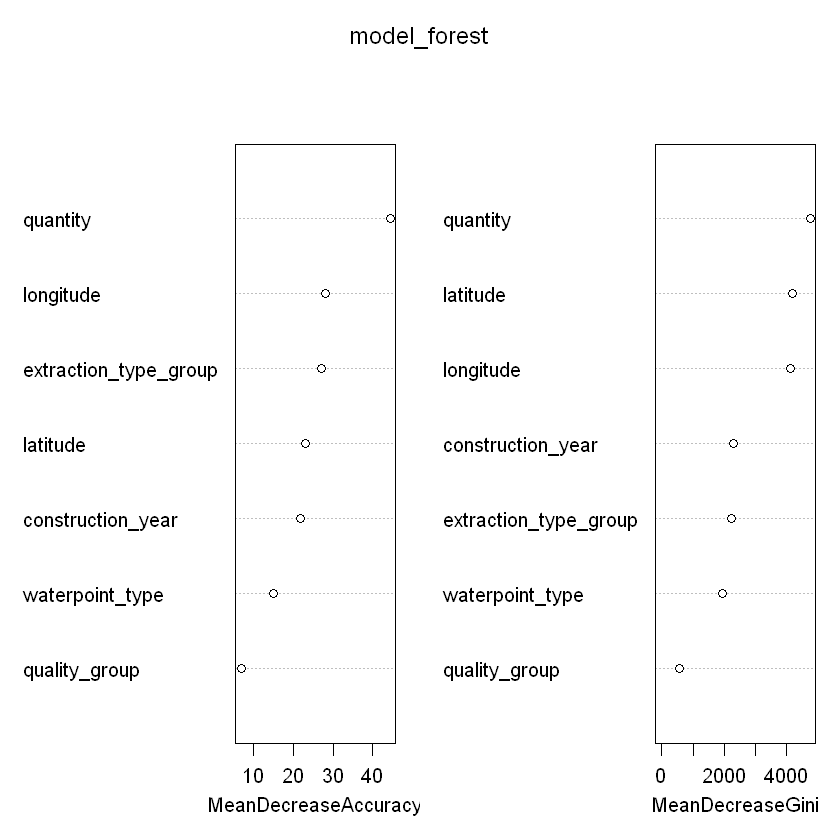

In [49]:
# Evaluating the importance of each variable
importance(model_forest)
varImpPlot(model_forest)

## 4. Predictions using Multinomial Logistic Regression

In [61]:
# Predictions using neural networks (nnet) library
library(nnet)

# Create a multinomial logistic regression model
model_reg <- multinom(status_group ~
                             longitude + 
                             latitude + 
                             extraction_type_group + 
                             quality_group + 
                             quantity + 
                             waterpoint_type + 
                             construction_year,
                             data = training) 

# Predict the values in training using the regression model
pred_reg_training <- predict(model_reg, training)

# Observe the first few predictions rows
head(pred_reg_training)

# Evaluate the model
confusionMatrix(pred_reg_training, training$status_group)

# weights:  96 (62 variable)
initial  value 65257.569947 
iter  10 value 47566.531357
iter  20 value 46179.536793
iter  30 value 44142.412856
iter  40 value 42705.382267
iter  50 value 42103.508368
iter  60 value 41935.354439
iter  70 value 41928.358420
iter  80 value 41928.326948
final  value 41928.324520 
converged


[1] functional     functional     functional     non functional functional    
[6] non functional
Levels: functional functional needs repair non functional

Confusion Matrix and Statistics

                         Reference
Prediction                functional functional needs repair non functional
  functional                   29544                    3696          10513
  functional needs repair         37                      13             64
  non functional                2678                     608          12247

Overall Statistics
                                          
               Accuracy : 0.7038          
                 95% CI : (0.7001, 0.7074)
    No Information Rate : 0.5431          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4068          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: functional Class: functional needs repair
Sensitivity                     0.9158                      0.0030114
Specificity                     0.4765                      0.9981664
Pos Pred Value                 